<a name = "inicio"></a>
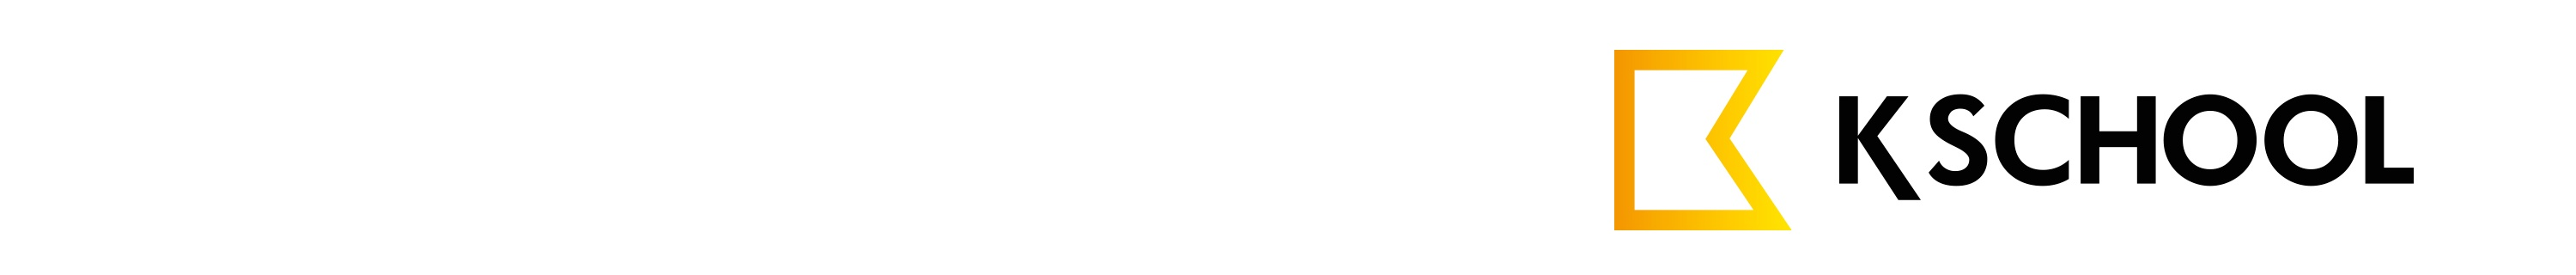

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">POS tagging</div>

# NLTK

### nltk.pos_tag

In [ ]:
text = "My tailor is rich and his name is Patrick"

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
text = "The suit was tailored especially for me"

In [ ]:
text = "And I told my tailor, Patrick, can you tailor that suit?"

### nltk.DefaultTagger

In [ ]:
dt = nltk.DefaultTagger("NN")

In [ ]:
dt.tag(words)

###### Evaluación de taggers

In [ ]:
data = nltk.corpus.treebank.tagged_sents()

In [ ]:
train = data[:3500]
test = data[3500:]

In [ ]:
print("Tamaño del bloque de entrenamiento:\t {}".format(len(train)))
print("Tamaño del bloque de pruebas:\t\t {}".format(len(test)))

In [ ]:
dt.evaluate(test)

### nltk.UnigramTagger

In [ ]:
ut = nltk.UnigramTagger(train)

In [ ]:
ut.evaluate(test)

In [ ]:
ut = nltk.UnigramTagger(train, backoff = dt)

In [ ]:
ut.evaluate(test)

### nltk.BigramTagger

In [ ]:
bt = nltk.BigramTagger(train)

In [ ]:
bt.evaluate(test)

In [ ]:
bt = nltk.BigramTagger(train,
                        backoff = nltk.UnigramTagger(train,
                        backoff = nltk.DefaultTagger("NN")))

In [ ]:
bt.evaluate(test)

### nltk.TrigramTagger

In [ ]:
tt = nltk.TrigramTagger(train,
                        backoff = nltk.BigramTagger(train,
                        backoff = nltk.UnigramTagger(train,
                        backoff = nltk.DefaultTagger("NN")
                        )))

In [ ]:
bt.evaluate(test)

### nltk.NgramTagger

In [ ]:
n5t = nltk.NgramTagger(5, train)

In [ ]:
n5t.evaluate(test)

In [ ]:
n5t = nltk.NgramTagger(5, train,
                        backoff = nltk.NgramTagger(4, train,
                        backoff = nltk.TrigramTagger(train,
                        backoff = nltk.BigramTagger(train, 
                        backoff = nltk.UnigramTagger(train,
                        backoff = nltk.DefaultTagger("NN")
                        )))))

In [ ]:
n5t.evaluate(test)

### nltk.RegexpTagger

In [ ]:
patterns = [
    (r'.*ing$', 'VBG'),               # Gerundio
    (r'.*ed$', 'VBD'),                # Pasado simple
    (r'.*es$', 'VBZ'),                # 3ª persona del singular del presente
    (r'.*ould$', 'MD'),               # Verbos modales
    (r'.*\'s$', 'NN$'),               # Posesivos
    (r'.*s$', 'NNS'),                 # Nombres en plural
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # Números cardinales
    (r'.*', 'NN')                     # Nombres (opción por defecto)
]

In [ ]:
tagger = nltk.RegexpTagger(patterns)

In [ ]:
tagger.evaluate(test)

In [ ]:
patterns = [
    (r'.*ing$', 'VBG'),               # Gerundio
    (r'.*ed$', 'VBD'),                # Pasado simple
    (r'.*es$', 'VBZ'),                # 3ª persona del singular del presente
    (r'.*ould$', 'MD'),               # Verbos modales
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD')   # Números cardinales
]

In [ ]:
tagger = nltk.RegexpTagger(patterns, 
            backoff = nltk.BigramTagger(train,
            backoff = nltk.UnigramTagger(train,
            backoff = nltk.DefaultTagger("NN")
            )))

In [ ]:
tagger.evaluate(test)

# Uso de nltk.RegexpTagger como backoff

# Spacy

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = "And I told my tailor, can you tailor that suit?"

https://spacy.io/api/token#attributes

https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md

In [ ]:
for label in nlp.get_pipe("tagger").labels:
    print(label, " -- ", spacy.explain(label))

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>